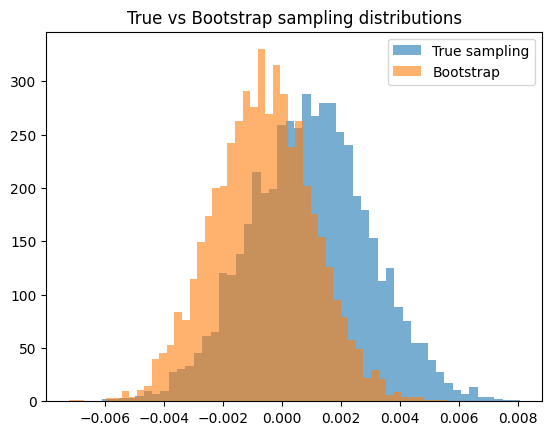

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# pretend this is the "true population" of returns
population = np.random.normal(0.001, 0.02, 100000)

# take one sample of size 100 (like we observed 100 days)
sample = np.random.choice(population, 100)

# compute true sampling distribution of sample means (requires population)
true_means = [np.mean(np.random.choice(population, 100)) for _ in range(5000)]

# bootstrap sampling distribution (we only resample from the observed sample)
bootstrap_means = [np.mean(np.random.choice(sample, 100, replace=True)) for _ in range(5000)]

plt.hist(true_means, bins=50, alpha=0.6, label='True sampling')
plt.hist(bootstrap_means, bins=50, alpha=0.6, label='Bootstrap')
plt.legend(); plt.title("True vs Bootstrap sampling distributions")
plt.show()


True Sampling Mean: 0.0010268941303775581
Bootstrap Mean: 0.0008044748940868679
True 95% CI: [-0.00284652  0.00500719]
Bootstrap 95% CI: [-0.00327428  0.00502595]


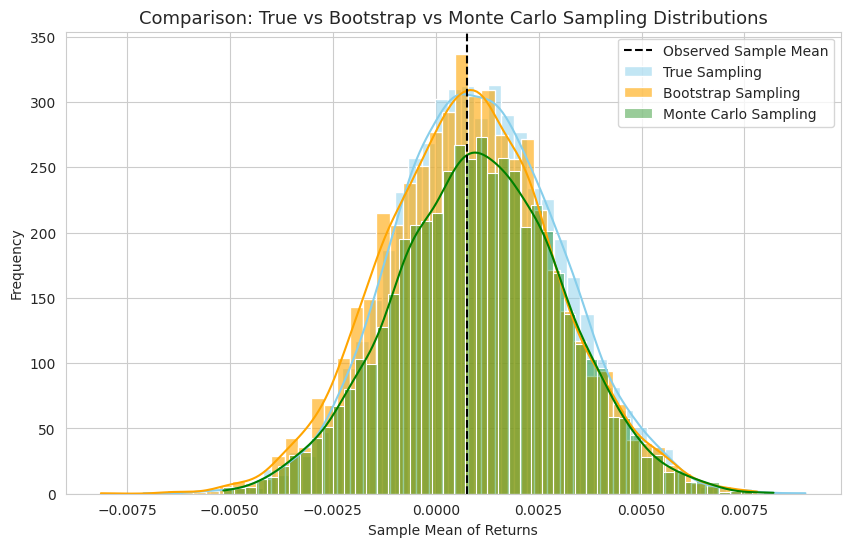

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility (important in simulations)
np.random.seed(42)

# -------------------------------------------------------------
# STEP 1: Create the 'true population'
# -------------------------------------------------------------
# Think of this as the "true universe" of daily returns for a stock.
# Let's assume the daily returns follow a Normal distribution:
# mean = 0.001 (0.1% average daily return), std = 0.02 (2% volatility)
population = np.random.normal(loc=0.001, scale=0.02, size=100_000)

# -------------------------------------------------------------
# STEP 2: Take a random sample from the population
# -------------------------------------------------------------
# Let's say we observed only 100 trading days of data:
sample_size = 100
sample = np.random.choice(population, size=sample_size, replace=False)

# -------------------------------------------------------------
# STEP 3: Compute the true sampling distribution
# -------------------------------------------------------------
# This can only be done if we have access to the full population.
# We take 5000 random samples of size 100 from the population
# and record their means to see how much they vary.
true_means = [np.mean(np.random.choice(population, size=sample_size, replace=False))
              for _ in range(5000)]

# -------------------------------------------------------------
# STEP 4: Compute the bootstrap sampling distribution
# -------------------------------------------------------------
# Here, we only use the observed sample (no population access).
# We draw 5000 bootstrap samples with replacement from our single sample.
bootstrap_means = [np.mean(np.random.choice(sample, size=sample_size, replace=True))
                   for _ in range(5000)]

# -------------------------------------------------------------
# STEP 5: Calculate confidence intervals
# -------------------------------------------------------------
# Bootstrap confidence interval for the mean
bootstrap_ci = np.percentile(bootstrap_means, [2.5, 97.5])
true_ci = np.percentile(true_means, [2.5, 97.5])

print("True Sampling Mean:", np.mean(true_means))
print("Bootstrap Mean:", np.mean(bootstrap_means))
print("True 95% CI:", true_ci)
print("Bootstrap 95% CI:", bootstrap_ci)

# -------------------------------------------------------------
# STEP 6: Monte Carlo Simulation for Comparison
# -------------------------------------------------------------
# Suppose we don't have real data, but we *know* the distribution of returns.
# Then we can simulate sample means using pure Monte Carlo (using known params).
montecarlo_means = [np.mean(np.random.normal(loc=0.001, scale=0.02, size=sample_size))
                    for _ in range(5000)]

# -------------------------------------------------------------
# STEP 7: Visualization
# -------------------------------------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(true_means, bins=50, color='skyblue', label='True Sampling', kde=True)
sns.histplot(bootstrap_means, bins=50, color='orange', label='Bootstrap Sampling', kde=True, alpha=0.6)
sns.histplot(montecarlo_means, bins=50, color='green', label='Monte Carlo Sampling', kde=True, alpha=0.4)

plt.axvline(np.mean(sample), color='black', linestyle='dashed', label='Observed Sample Mean')
plt.title("Comparison: True vs Bootstrap vs Monte Carlo Sampling Distributions", fontsize=13)
plt.xlabel("Sample Mean of Returns")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# -------------------------------------------------------------
# STEP 8: Interpretation (conceptual)
# -------------------------------------------------------------
# - True sampling: The “God’s eye” view (requires knowing population).
# - Bootstrap: The “econometrician’s” view — what we can estimate from finite data.
# - Monte Carlo: The “modeler’s” view — when we assume a known distribution.

# Each of these produces an approximation of uncertainty in our estimates.
